In [1]:
from pathlib import Path

import pandas as pd

from plate import Plate, QCPlate, SamplePlate
from study import Study

In [2]:
p = Plate(12)
print(p)

[    INFO] --- Created a 3x4 plate with 12 wells.


Plate ID: 1
Dimensions: 3 rows x 4 columns
Plate Layout (Well Names):
[['A1' 'A2' 'A3' 'A4']
 ['B1' 'B2' 'B3' 'B4']
 ['C1' 'C2' 'C3' 'C4']]


In [3]:
ps = SamplePlate()
ps.as_dataframe()

[    INFO] --- Created a 8x12 plate with 96 wells.


,name,plate_id,coordinate,index,empty,rgb_color,sample_code,sample_name
0,A1,1,"(0, 0)",0,True,"(1, 1, 1)",S,Specimen
1,A2,1,"(0, 1)",1,True,"(1, 1, 1)",S,Specimen
2,A3,1,"(0, 2)",2,True,"(1, 1, 1)",S,Specimen
3,A4,1,"(0, 3)",3,True,"(1, 1, 1)",S,Specimen
4,A5,1,"(0, 4)",4,True,"(1, 1, 1)",S,Specimen
...,...,...,...,...,...,...,...,...
91,H8,1,"(7, 7)",91,True,"(1, 1, 1)",S,Specimen
92,H9,1,"(7, 8)",92,True,"(1, 1, 1)",S,Specimen
93,H10,1,"(7, 9)",93,True,"(1, 1, 1)",S,Specimen
94,H11,1,"(7, 10)",94,True,"(1, 1, 1)",S,Specimen


In [4]:
qc_sample_pattern = Path("../../data/plate_config_dynamic.toml")
qcp = QCPlate(QC_config=qc_sample_pattern)
qcp.as_dataframe()

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ../../data/plate_config_dynamic.toml
[    INFO] --- Creating dynamic plate layout with QC samples.


,name,plate_id,coordinate,index,empty,rgb_color,QC,sample_code,sample_type,sample_name
0,A1,1,"(0, 0)",0,True,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC1
1,A2,1,"(0, 1)",1,True,"(1, 1, 1)",True,PB,PB: Paper_Blank,PB1
2,A3,1,"(0, 2)",2,True,"(1, 1, 1)",False,S,Specimen,S1
3,A4,1,"(0, 3)",3,True,"(1, 1, 1)",False,S,Specimen,S2
4,A5,1,"(0, 4)",4,True,"(1, 1, 1)",False,S,Specimen,S3
...,...,...,...,...,...,...,...,...,...,...
91,H8,1,"(7, 7)",91,True,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC8
92,H9,1,"(7, 8)",92,True,"(1, 1, 1)",True,PO,PO: Pooled_specimens,PO4
93,H10,1,"(7, 9)",93,True,"(1, 1, 1)",False,S,Specimen,S1
94,H11,1,"(7, 10)",94,True,"(1, 1, 1)",False,S,Specimen,S2


In [5]:
fake_samples_csv_file = Path("../../data/fake_case_control_Npairs_523_Ngroups_5.csv")

samples_df = pd.read_csv(fake_samples_csv_file)

samples_df

,Unnamed: 0,pair_ID,specimen_ID,object,date_of_birth,barcode,organ
0,0,0,888,Control,1993-12-13,95388762,Parotid glands
1,1,0,889,Case,1993-12-13,66794295,Parotid glands
2,2,1,962,Control,2006-06-22,69215322,Tendons
3,3,1,963,Case,2006-06-22,77642424,Tendons
4,4,2,261,Control,1999-05-06,30225664,Parotid glands
...,...,...,...,...,...,...,...
1041,1041,520,66,Case,1991-08-29,772655,Mammary glands
1042,1042,521,558,Control,1993-03-21,49757491,Parotid glands
1043,1043,521,559,Case,1993-03-24,46022059,Parotid glands
1044,1044,522,710,Control,2002-03-23,73437017,Mammary glands


In [6]:
study = Study("fake_study")
study.load_specimen_records(fake_samples_csv_file)
study.distribute_samples_to_plates(SamplePlate())


[    INFO] --- Found group index in column pair_ID
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ
[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Distributed samples across 11 plates.


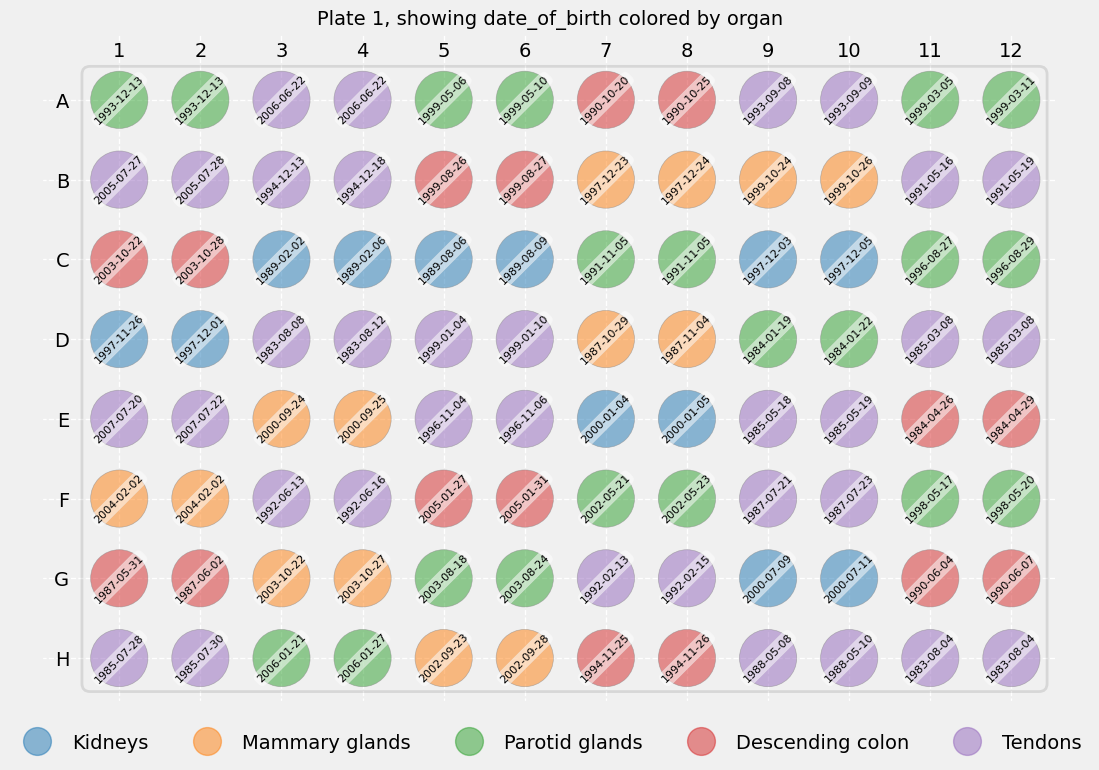

In [11]:
fig = study[0].as_figure(
    color_metadata_key="organ",
    annotation_metadata_key="date_of_birth",
    rotation=45,
    well_size=1700,
    plt_style="fivethirtyeight",
    colormap="tab10",
    alpha=0.5,
    show_grid=False,
    legend_bb=(0.15, -0.1, 0.7, 1.5),
)

In [8]:
study_with_qc = Study("fake_study")
study_with_qc.load_specimen_records(fake_samples_csv_file)

[    INFO] --- Found group index in column pair_ID
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ


In [9]:
qc_sample_pattern = Path("../../data/plate_config_dynamic.toml")
qc_plate = QCPlate(QC_config=qc_sample_pattern)

study_with_qc.distribute_samples_to_plates(qc_plate)

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ../../data/plate_config_dynamic.toml
[    INFO] --- Creating dynamic plate layout with QC samples.
[    INFO] --- Distributed samples across 14 plates.


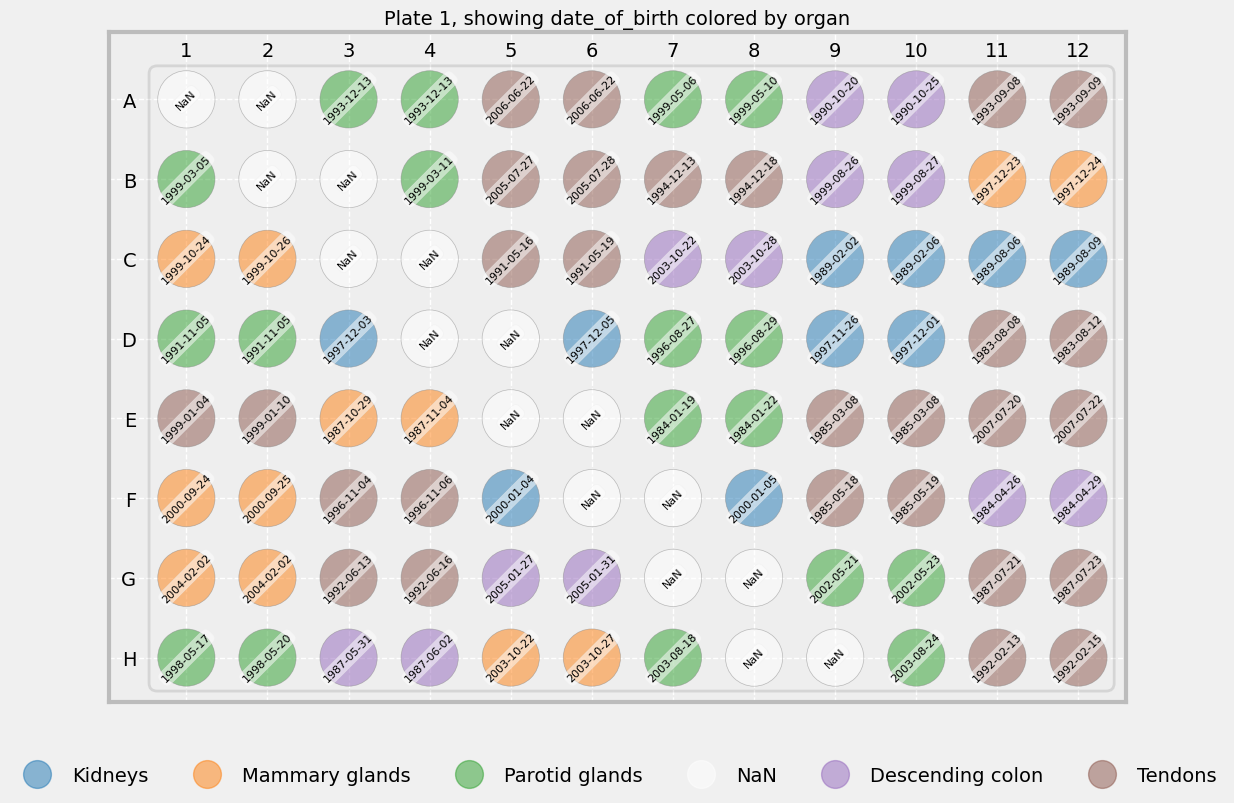

In [10]:
fig = study_with_qc[0].as_figure(
    color_metadata_key="organ",
    annotation_metadata_key="date_of_birth",
    rotation=45, well_size=1700,
    colormap="tab10",
    alpha=0.5
    )